# vLife Virtusa

## Prediction of Patients Having Strokes

<p> Patient will provide his/her medical diagnosis along with demographic features. Based on that the model will predict the patient is prone towards heart sroke or not.Complete Machine learning pipeline have been performed starting from EDA to Model training and evaluation.Random Forest is choosen classifier for this usecase. </p>

### Data Source
Data for this usecase available [here](https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data)


### Dataset Description
- Features Available
   - id
   - gender
   - age
   - hypertension
   - heart_disease
   - ever_married
   - work_type
   - Residence_type
   - avg_glucose_level
   - bmi
   - smoking_status

##### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('../input/train_2v.csv')
test_data = pd.read_csv('../input/test_2v.csv')

In [3]:
train_data.shape

(43400, 12)

In [4]:
test_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [5]:
print ('Train Data Shape: {}'.format(train_data.shape))

print ('Test Data Shape: {}'.format(test_data.shape))

Train Data Shape: (43400, 12)
Test Data Shape: (18601, 11)


In [6]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


## Exploratory Data Analysis
### Data Preprocessing

> Missing Values Treatment for Train and Test Data

In [7]:
train_data.isnull().sum()/len(train_data)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [8]:
test_data.isnull().sum()/len(test_data)*100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.177249
smoking_status       30.917693
dtype: float64

In [9]:
joined_data = pd.concat([train_data,test_data])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [10]:
print ('Joined Data Shape: {}'.format(joined_data.shape))

Joined Data Shape: (62001, 12)


In [11]:
joined_data.isnull().sum()/len(joined_data)*100

Residence_type        0.000000
age                   0.000000
avg_glucose_level     0.000000
bmi                   3.311237
ever_married          0.000000
gender                0.000000
heart_disease         0.000000
hypertension          0.000000
id                    0.000000
smoking_status       30.714021
stroke               30.001129
work_type             0.000000
dtype: float64

> Joined Data has bmi 3.33% data is missing and smoking_status is 30.7% missing

In [12]:
train_data["bmi"]=train_data["bmi"].fillna(train_data["bmi"].mean())

In [13]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


#### Handling Categorical Variables

In [14]:
label = LabelEncoder()
train_data['gender'] = label.fit_transform(train_data['gender'])
train_data['ever_married'] = label.fit_transform(train_data['ever_married'])
train_data['work_type']= label.fit_transform(train_data['work_type'])
train_data['Residence_type']= label.fit_transform(train_data['Residence_type'])

In [15]:
train_data_without_smoke = train_data[train_data['smoking_status'].isnull()]
train_data_with_smoke = train_data[train_data['smoking_status'].notnull()]

In [16]:
train_data_without_smoke.drop(columns='smoking_status',axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
train_data_without_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,0
5,32257,0,47.0,0,0,1,2,1,210.95,50.1,0
10,10460,0,79.0,0,0,1,0,1,77.08,35.0,0


In [18]:
train_data_with_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,never smoked,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,formerly smoked,0
6,52800,0,52.0,0,0,1,2,1,77.59,17.7,formerly smoked,0
7,41413,0,75.0,0,1,1,3,0,243.53,27.0,never smoked,0
8,15266,0,32.0,0,0,1,2,0,77.67,32.3,smokes,0


In [19]:
train_data_with_smoke['smoking_status']= label.fit_transform(train_data_with_smoke['smoking_status'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
train_data_with_smoke.head()
train_data_with_smoke.shape

(30108, 12)

In [21]:
train_data_with_smoke.corr('pearson')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.005445,0.000131,0.002157,0.013075,0.000043,0.008955,-0.000966,0.020976,0.013226,0.004082,0.002238
gender,0.005445,1.000000,0.040785,0.037431,0.097549,0.024852,0.010247,0.004814,0.053496,0.019278,-0.013613,0.013689
age,0.000131,0.040785,1.000000,0.259528,0.251819,0.546996,0.018850,0.004044,0.230682,0.101619,-0.147968,0.159838
hypertension,0.002157,0.037431,0.259528,1.000000,0.114957,0.133258,0.019309,-0.004427,0.154702,0.120730,-0.030094,0.073310
heart_disease,0.013075,0.097549,0.251819,0.114957,1.000000,0.098229,0.034466,-0.000583,0.139449,0.018562,-0.035660,0.107007
ever_married,0.000043,0.024852,0.546996,0.133258,0.098229,1.000000,-0.067305,0.004990,0.120161,0.139949,-0.053049,0.051666
work_type,0.008955,0.010247,0.018850,0.019309,0.034466,-0.067305,1.000000,-0.010796,0.008315,-0.066278,-0.030810,0.025708
Residence_type,-0.000966,0.004814,0.004044,-0.004427,-0.000583,0.004990,-0.010796,1.000000,-0.001361,-0.002944,0.010095,0.002064
avg_glucose_level,0.020976,0.053496,0.230682,0.154702,0.139449,0.120161,0.008315,-0.001361,1.000000,0.167699,-0.035164,0.077206
bmi,0.013226,0.019278,0.101619,0.120730,0.018562,0.139949,-0.066278,-0.002944,0.167699,1.000000,-0.035568,-0.006950


#### Handling Imbalanced Data
> Now lets look at the number of positive and negative cases we have for stroke data

In [22]:
train_data_with_smoke['stroke'].value_counts()

0    29470
1      638
Name: stroke, dtype: int64

In [23]:
train_data_without_smoke['stroke'].value_counts()

0    13147
1      145
Name: stroke, dtype: int64

_In both cases we can see we are dealing with imbalanced data set, if we go ahead with that there is a high possibility that it ML algorithm will predict no stroke for all data. So we need to make the data more balanced_

_Using ROSE method to deal with that and make data more balanced which generates artificial data to make the set more balanced_

In [24]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE()

In [25]:
X_resampled, y_resampled = ros.fit_resample(train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'], 
                                            train_data_with_smoke['stroke'])

In [26]:
train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi'],
      dtype='object')

In [27]:
print ('ROS Input Data Shape for Smoke Data: {}'.format(X_resampled.shape))
print ('ROS Output Data Shape for Smoke Data: {}'.format(y_resampled.shape))

ROS Input Data Shape for Smoke Data: (58940, 11)
ROS Output Data Shape for Smoke Data: (58940,)


In [28]:
X_resampled_1, y_resampled_1 = ros.fit_resample(train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'], 
                                            train_data_without_smoke['stroke'])

In [29]:
print ('ROS Input Data Shape for Non Smoke Data: {}'.format(X_resampled_1.shape))
print ('ROS Output Data Shape for Non Smoke Data: {}'.format(y_resampled_1.shape))

ROS Input Data Shape for Non Smoke Data: (26294, 10)
ROS Output Data Shape for Non Smoke Data: (26294,)


#### Train Test Split for Balanced Data

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(47152, 11)
(11788, 11)


In [31]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_resampled_1,y_resampled_1,test_size=0.2)
print(X_train_1.shape)
print(X_test_1.shape)

(21035, 10)
(5259, 10)


## Predictive Model
### Model Selection


> **Decision Tree Classifier with Smoking Status**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5932
           1       0.98      1.00      0.99      5856

   micro avg       0.99      0.99      0.99     11788
   macro avg       0.99      0.99      0.99     11788
weighted avg       0.99      0.99      0.99     11788

0.9875296912114014
[[5785  147]
 [   0 5856]]
precision =  0.975512243878061 
 recall =  1.0


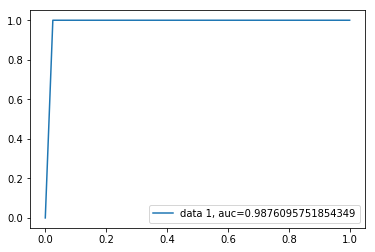

                   Importance
age                  0.385311
avg_glucose_level    0.197441
id                   0.171923
bmi                  0.136762
work_type            0.026870
smoking_status       0.023773
heart_disease        0.016227
Residence_type       0.015225
gender               0.011532
ever_married         0.007728
hypertension         0.007208


In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred = dtree.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(dtree.feature_importances_ ,index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

> **Decision Tree Classifier without Smoking Status**

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2585
           1       0.99      1.00      1.00      2674

   micro avg       1.00      1.00      1.00      5259
   macro avg       1.00      1.00      1.00      5259
weighted avg       1.00      1.00      1.00      5259

Accuracy: 0.9965772960638904
COnfusion Matrix: 
 [[2567   18]
 [   0 2674]]
precision =  0.9933135215453195 
 recall =  1.0


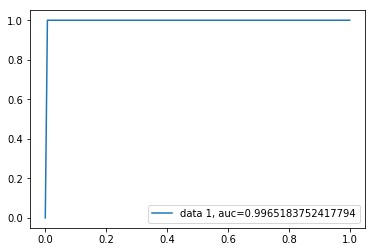

                   Importance
age                  0.558764
bmi                  0.147062
avg_glucose_level    0.136488
id                   0.088705
work_type            0.030015
ever_married         0.014128
Residence_type       0.011087
gender               0.009877
heart_disease        0.001983
hypertension         0.001888


In [33]:
dtree_nosmoke = DecisionTreeClassifier()
dtree_nosmoke.fit(X_train_1,y_train_1)

pred = dtree_nosmoke.predict(X_test_1)
print(classification_report(y_test_1,pred))
print ('Accuracy: {}'.format(accuracy_score(y_test_1,pred)))
print ('COnfusion Matrix: \n {}'.format(confusion_matrix(y_test_1,pred)))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = dtree_nosmoke.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(dtree_nosmoke.feature_importances_ ,index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

> **Logistic Regression Classifier with Smoking Status**

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.71      0.74      5932
           1       0.73      0.79      0.76      5856

   micro avg       0.75      0.75      0.75     11788
   macro avg       0.75      0.75      0.75     11788
weighted avg       0.75      0.75      0.75     11788

0.7485578554462164
[[4227 1705]
 [1259 4597]]
precision =  0.7294509679466836 
 recall =  0.7850068306010929


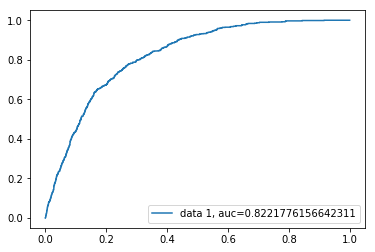

                   Importance
heart_disease        0.525143
hypertension         0.440026
Residence_type       0.104891
gender               0.086381
age                  0.070461
smoking_status       0.033666
work_type            0.020607
avg_glucose_level    0.004179
id                   0.000002
bmi                 -0.016381
ever_married        -0.031245


In [34]:
log = LogisticRegression(penalty='l2', C=0.1)
log.fit(X_train,y_train)

pred = log.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
impFeatures = pd.DataFrame(log.coef_[0] ,index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

> **Logistic Regression Classifier without Smoking Status**

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.78      0.83      2585
           1       0.81      0.89      0.85      2674

   micro avg       0.84      0.84      0.84      5259
   macro avg       0.84      0.84      0.84      5259
weighted avg       0.84      0.84      0.84      5259

0.8389427647841795
[[2020  565]
 [ 282 2392]]
precision =  0.8089279675346636 
 recall =  0.8945400149588631


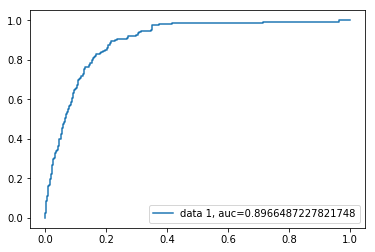

                   Importance
heart_disease        0.821785
gender               0.386261
Residence_type       0.117109
age                  0.072017
hypertension         0.053539
ever_married         0.033608
work_type            0.009669
avg_glucose_level    0.003305
id                   0.000002
bmi                 -0.005717


In [35]:
logg = LogisticRegression(penalty='l2', C=0.1)
logg.fit(X_train_1,y_train_1)

pred = logg.predict(X_test_1)
print(classification_report(y_test_1,pred))
print (accuracy_score(y_test_1,pred))
print (confusion_matrix(y_test_1,pred))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = logg.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(logg.coef_[0] ,index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

> **Random Forest Classifier with Smoking Status**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2585
           1       1.00      1.00      1.00      2674

   micro avg       1.00      1.00      1.00      5259
   macro avg       1.00      1.00      1.00      5259
weighted avg       1.00      1.00      1.00      5259

0.9998098497813273
[[2584    1]
 [   0 2674]]
precision =  0.9996261682242991 
 recall =  1.0


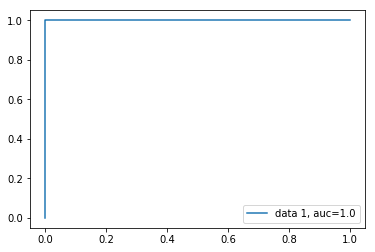

                   Importance
age                  0.369743
bmi                  0.173655
avg_glucose_level    0.122492
id                   0.097230
work_type            0.090173
ever_married         0.074769
heart_disease        0.028913
gender               0.016019
Residence_type       0.014579
hypertension         0.012426


In [36]:
ran = RandomForestClassifier(n_estimators=50,random_state=0)
ran.fit(X_train_1,y_train_1)

pred = ran.predict(X_test_1)
print(classification_report(y_test_1,pred))
print (accuracy_score(y_test_1,pred))
print (confusion_matrix(y_test_1,pred))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = ran.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


impFeatures = pd.DataFrame((ran.feature_importances_) ,index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

### Feature Importance with Random Forest

> So we can see that Age, hypertension, heart disease, Residence type, Avg Glucose level, BMI and Smoking status comes as significate variable here. A few of them are intuitive as well, but Gender, Marriage status and Work Status are some which we can ignore.

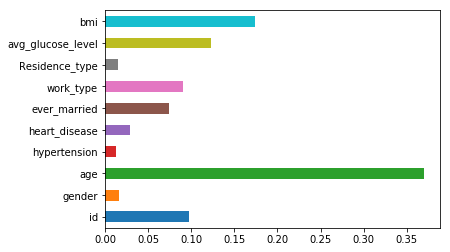

In [37]:
feat_importances = pd.Series(ran.feature_importances_, index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns)
feat_importances.plot(kind='barh')

In [38]:
test_data["bmi"]=test_data["bmi"].fillna(test_data["bmi"].mean())

In [39]:
test_data.drop(axis=1,columns=['smoking_status'],inplace=True)

In [40]:
label = LabelEncoder()
test_data['gender'] = label.fit_transform(test_data['gender'])
test_data['ever_married'] = label.fit_transform(test_data['ever_married'])
test_data['work_type']= label.fit_transform(test_data['work_type'])
test_data['Residence_type']= label.fit_transform(test_data['Residence_type'])
pred = ran.predict(test_data)

In [41]:
prediction = pd.DataFrame(pred,columns=['Pred'])

### Model Predictions

In [42]:
prediction['Pred'].value_counts()

0    18589
1       12
Name: Pred, dtype: int64

### Conclusion
Overall we used logistic regression to forecast weather a patient can have stroke or not. We has to deal with imbalanced data which is common in such healthcare problems. For improving the model we could try out other ways of dealing with imbalanced data like SMOTE.

Also we could have dealt with missing data of smoke status in other ways as well for e.g. Age less than 10 or 15 years patients could have been tagged as never_smoked etc.

Finally just one thought on why the 2 models were so different, one of the reasons could be the age distribution of the 2 data set. Median age of Smoke dataset was 48 while that of Non smoke dataset was 21. These are some ways Logistic model could have been improved.

## END